In [128]:
import sys
sys.path.append('..')

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("../data/responses.csv")

In [131]:
def fat_shame(weight):
    if weight > 100:
        return 'Fat'
    elif weight < 50:
        return 'Skinny'
    else:
        return 'Normal'



<Axes: xlabel='Weight'>

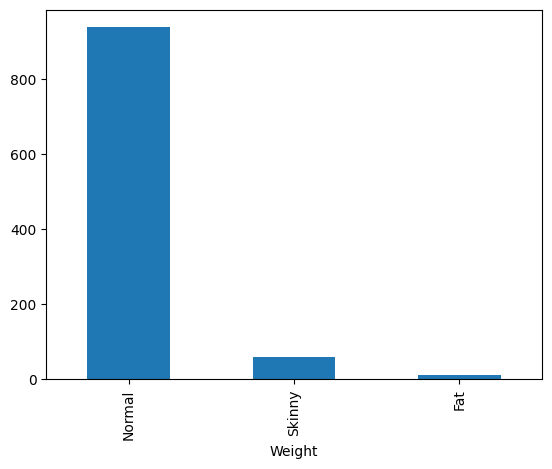

In [132]:
df_copy = df.copy()
df_copy['Weight'] = df['Weight'].apply(fat_shame)
df_copy['Weight'].value_counts().plot(kind='bar')


In [133]:
data_columns = ['Height', 'Weight', 'Age', 'Gender']
data = df[data_columns]

In [134]:
data['Weight_sum'] = data.groupby('Gender')['Weight'].transform('sum')
list(data.groupby('Gender')['Weight_sum'].unique())

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_5914/1001130811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight_sum'] = data.groupby('Gender')['Weight'].transform('sum')


[array([34199.]), array([31221.])]

In [135]:
data['Wight_to_height'] = data.groupby('Gender')['Weight'].transform('mean')

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_5914/2872738438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wight_to_height'] = data.groupby('Gender')['Weight'].transform('mean')


In [137]:
grouped = data.groupby('Gender')

data['Weight_filled'] = grouped['Weight'].transform(lambda x: x.fillna(x.mean()))

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_5914/1252296922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight_filled'] = grouped['Weight'].transform(lambda x: x.fillna(x.mean()))


,Height,Weight,Age,Gender,Weight_sum,Wight_to_height,Weight_filled
0,163.0,48.0,20.0,female,34199.0,58.963793,48.0
1,163.0,58.0,19.0,female,34199.0,58.963793,58.0
2,176.0,67.0,20.0,female,34199.0,58.963793,67.0
3,172.0,59.0,22.0,female,34199.0,58.963793,59.0
4,170.0,59.0,20.0,female,34199.0,58.963793,59.0
...,...,...,...,...,...,...,...
1005,164.0,57.0,20.0,female,34199.0,58.963793,57.0
1006,183.0,80.0,27.0,male,31221.0,77.088889,80.0
1007,173.0,75.0,18.0,female,34199.0,58.963793,75.0
1008,173.0,58.0,25.0,female,34199.0,58.963793,58.0


In [154]:
list(data.sample(20)[['Gender', 'Weight', 'Age']].groupby("Gender"))[0][1]

,Gender,Weight,Age
1003,female,63.0,20.0
484,female,57.0,20.0
978,female,60.0,21.0
386,female,55.0,19.0
452,female,63.0,28.0
591,female,55.0,20.0
113,female,60.0,21.0
251,female,60.0,19.0
684,female,57.0,28.0
126,female,56.0,20.0


In [138]:
data['Weight_rolling'] = data['Weight'].rolling(2).mean()
data.head(10)

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_5914/2581837744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight_rolling'] = data['Weight'].rolling(2).mean()


,Height,Weight,Age,Gender,Weight_sum,Wight_to_height,Weight_filled,Weight_rolling
0,163.0,48.0,20.0,female,34199.0,58.963793,48.0,NaN
1,163.0,58.0,19.0,female,34199.0,58.963793,58.0,53.0
2,176.0,67.0,20.0,female,34199.0,58.963793,67.0,62.5
3,172.0,59.0,22.0,female,34199.0,58.963793,59.0,63.0
4,170.0,59.0,20.0,female,34199.0,58.963793,59.0,59.0
5,186.0,77.0,20.0,male,31221.0,77.088889,77.0,68.0
6,177.0,50.0,20.0,female,34199.0,58.963793,50.0,63.5
7,184.0,90.0,19.0,male,31221.0,77.088889,90.0,70.0
8,166.0,55.0,18.0,female,34199.0,58.963793,55.0,72.5
9,174.0,60.0,19.0,female,34199.0,58.963793,60.0,57.5


In [141]:
# neccesary for correct Weight_rolling calculation
data = data.sort_values(by=['Gender'])

data['Height_rolling'] = (
    data.groupby('Gender')['Height']
    .transform(lambda x: x.rolling(window=3, min_periods=2).mean())    
)

In [146]:
data['Age_rolling'] = (
    data.groupby('Gender')['Age']
    .transform(lambda x: x.expanding(min_periods=3).mean())
)

data.head(10)
data[data['Gender'] == 'male']

,Height,Weight,Age,Gender,Weight_sum,Wight_to_height,Weight_filled,Weight_rolling,Age_rolling
439,175.0,70.0,19.0,male,31221.0,77.088889,70.0,NaN,NaN
320,178.0,88.0,20.0,male,31221.0,77.088889,88.0,79.000000,NaN
323,178.0,68.0,20.0,male,31221.0,77.088889,68.0,75.333333,19.666667
460,189.0,78.0,22.0,male,31221.0,77.088889,78.0,78.000000,20.250000
325,185.0,62.0,19.0,male,31221.0,77.088889,62.0,69.333333,20.000000
...,...,...,...,...,...,...,...,...,...
20,186.0,77.0,20.0,male,31221.0,77.088889,77.0,76.333333,20.864198
836,187.0,88.0,19.0,male,31221.0,77.088889,88.0,80.333333,20.859606
837,183.0,65.0,20.0,male,31221.0,77.088889,65.0,76.666667,20.857494
854,180.0,75.0,27.0,male,31221.0,77.088889,75.0,76.000000,20.872549
